In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings 
warnings .filterwarnings("ignore")
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv ("AIML Dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.shape[0]

6362620

In [10]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

0.13

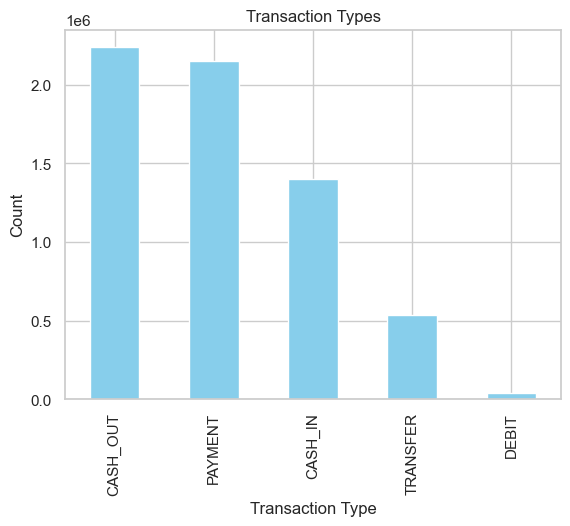

In [11]:
#Exploratory Data Analysis
df["type"].value_counts().plot(kind="bar", title = "Transaction Types",color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

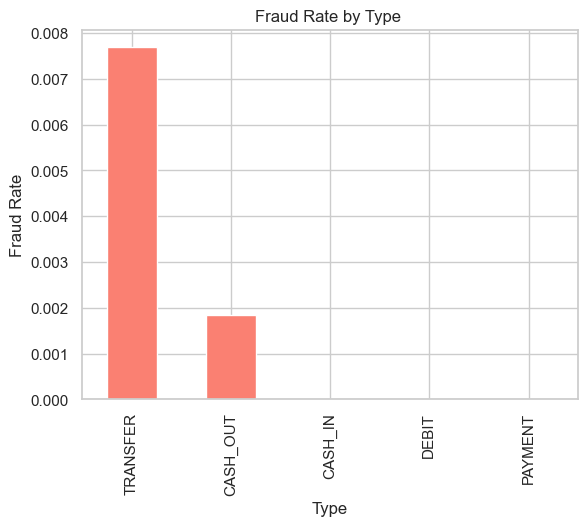

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type ", color = "salmon") 
plt.xlabel("Type")
plt.ylabel("Fraud Rate")
plt.show

In [13]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

In [15]:
df["balanceDiffOrg"] = df ["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df ["newbalanceDest"] - df["oldbalanceDest"]

In [16]:
(df["balanceDiffOrg"] < 0).sum()


1399253

In [17]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [18]:
df.drop(columns="step",inplace=True)

In [19]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [20]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [21]:
top_recievers = df["nameDest"].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [22]:
fraud_users = df[df["isFraud"]==1] ["nameOrig"].value_counts().head(10)

In [23]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [24]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [25]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [26]:
corr = df[["amount","oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


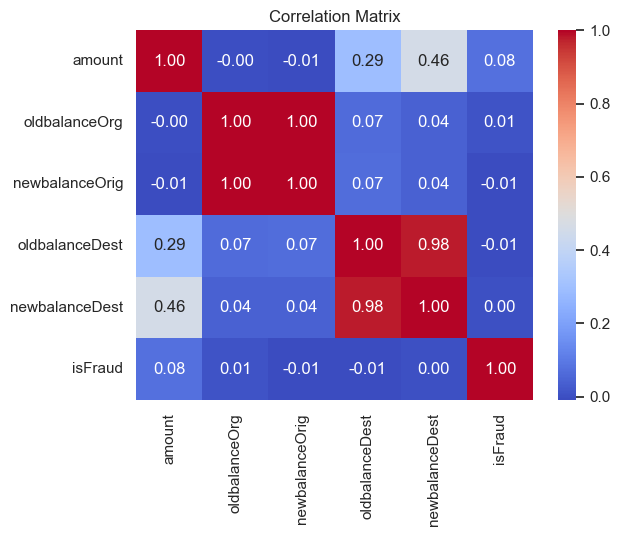

In [27]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<h1> Preprocessing </h1>

In [ ]:
# Handling Missing Values
df.isnull().sum() 

type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrg     0
balanceDiffDest    0
dtype: int64

In [ ]:
# Handling Duplicates
df.duplicated().sum()

0

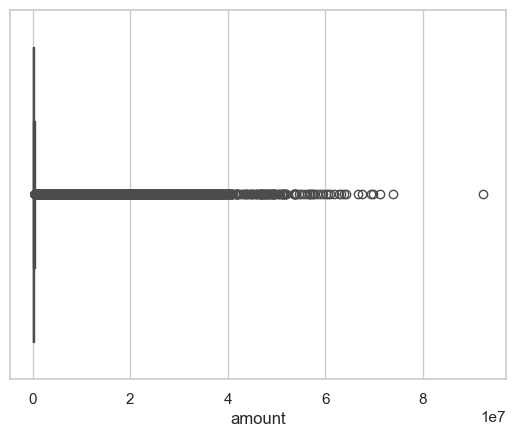

In [ ]:
# Handling Outliers
import seaborn as sns
sns.boxplot(x=df['amount'])


df = df[df['amount'] < df['amount'].quantile(0.999)] 


<h1> Feature Engineering </h1>

In [31]:

df["zero_after_transfer"] = (
    (df["type"].isin(["TRANSFER", "CASH_OUT"])) &
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0)
).astype(int)

In [32]:
len(df["zero_after_transfer"])

6356257

In [33]:
df["zero_after_transfer"].head()

0    0
1    0
2    1
3    1
4    0
Name: zero_after_transfer, dtype: int32

In [34]:
df["isFraud"].value_counts()

isFraud
0    6348394
1       7863
Name: count, dtype: int64

In [35]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest,zero_after_transfer
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,0


In [36]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest,zero_after_transfer
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00,1


<h1> Model Training </h1>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV



In [38]:
categorical = ["type"]
numeric = [
    "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "balanceDiffOrg", "balanceDiffDest"
]

In [39]:
numeric.append("zero_after_transfer")

In [40]:
x = df_model.drop("isFraud", axis=1)
y = df_model["isFraud"]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [42]:
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "XGBoost": XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss'),
    "LGBM": LGBMClassifier(class_weight='balanced', random_state=42)
}


In [ ]:
# Encoding
categorical = ["type"]
numeric = [
    "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "balanceDiffOrg", "balanceDiffDest"
]
numeric.append("zero_after_transfer")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)

In [44]:
# Logistic Regression
logreg_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [45]:
logreg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrg',
                                                   'balanceDiffDest',
                                                   'zero_after_transfer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred_logreg = logreg_pipeline.predict(x_test)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1904519
           1       0.03      0.99      0.05      2359

    accuracy                           0.95   1906878
   macro avg       0.51      0.97      0.51   1906878
weighted avg       1.00      0.95      0.98   1906878





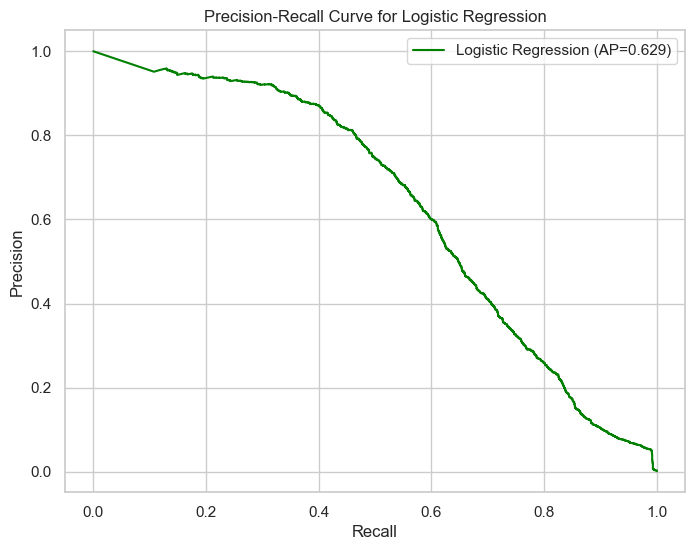

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report

# Predict class labels
y_pred_logreg = logreg_pipeline.predict(x_test)

print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_logreg))
print("\n")

# Get predicted probabilities for positive class (fraud=1)
y_scores_logreg = logreg_pipeline.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores_logreg)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores_logreg)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Logistic Regression (AP={avg_precision:.3f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()



In [48]:
# Decision Tree
# Define parameter grid to tune
param_grid = {
    'clf__max_depth': [5, 10, 20, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy']
}

In [49]:
dt_pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

In [50]:
# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    scoring='f1', 
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [51]:
# Fit GridSearch to your training data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest',
                                                                          'balanceDiffOrg',
                                                                          'balanceDiffDest',
                                                                          'zero_after_transfer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['type'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [5, 10, 20, None],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [52]:
# Best parameters found
print("Best parameters:", grid_search.best_params_)

 

Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


In [53]:
# Best estimator
best_dt_model = grid_search.best_estimator_ 

Classification Report for Tuned Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904519
           1       0.90      0.88      0.89      2359

    accuracy                           1.00   1906878
   macro avg       0.95      0.94      0.94   1906878
weighted avg       1.00      1.00      1.00   1906878



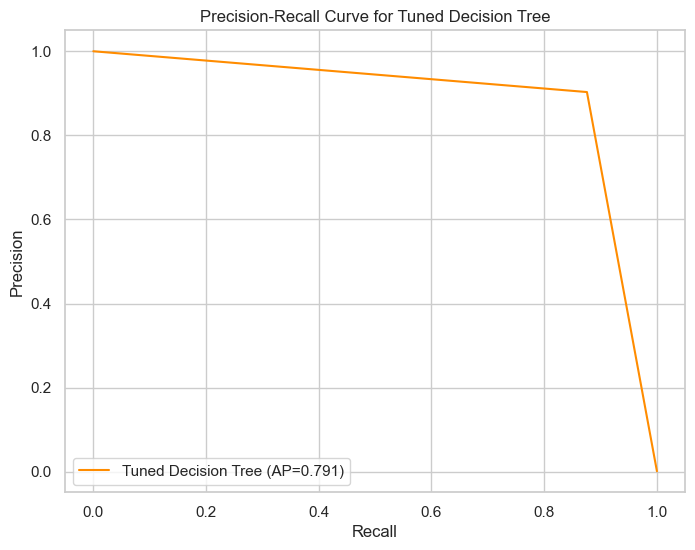

In [54]:
# Predict class labels and probabilities
y_pred = best_dt_model.predict(x_test)
y_scores = best_dt_model.predict_proba(x_test)[:, 1]

# Print classification report
print("Classification Report for Tuned Decision Tree")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Tuned Decision Tree (AP={avg_precision:.3f})", color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Tuned Decision Tree")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()



In [55]:
# Random Forest
rf_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(class_weight="balanced"))
])

In [56]:
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrg',
                                                   'balanceDiffDest',
                                                   'zero_after_transfer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [57]:
y_pred_rf = rf_pipeline.predict(x_test)

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904519
           1       0.96      0.80      0.87      2359

    accuracy                           1.00   1906878
   macro avg       0.98      0.90      0.94   1906878
weighted avg       1.00      1.00      1.00   1906878





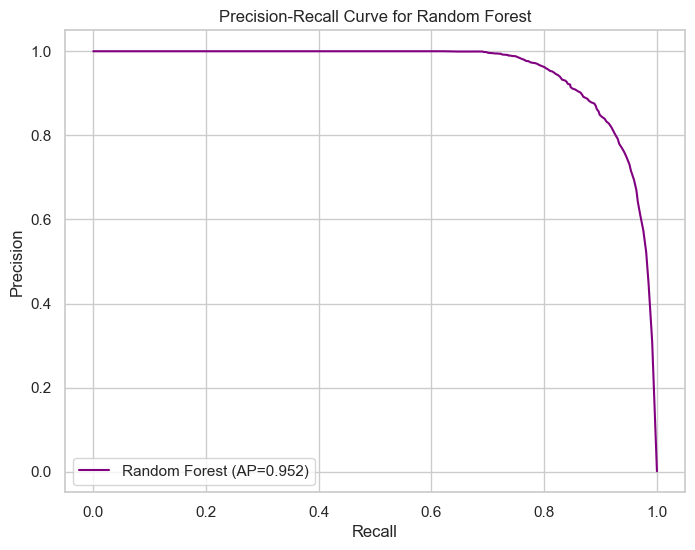

In [58]:
# Predict class labels
y_pred_rf = rf_pipeline.predict(x_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("\n")

# Get predicted probabilities for positive class (fraud=1)
y_scores_rf = rf_pipeline.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores_rf)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores_rf)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Random Forest (AP={avg_precision:.3f})", color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# XGBoost
xgb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss'))
])

In [60]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.05, 0.1],
    "clf__subsample": [0.8, 1.0]
}

# Pipeline
xgb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# GridSearchCV object
grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=3,
    scoring="average_precision",  # important!
    verbose=2,
    n_jobs=-1
)

# Train (fit) the model
grid_search_xgb.fit(x_train, y_train)




Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest',
                                                                          'balanceDiffOrg',
                                                                          'balanceDiffDest',
                                                                          'zero_after_transfer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['type'])])),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=No...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.05, 0.1],
                         'clf__max_depth': [3, 5, 7],
                         'clf__n_estimators': [100, 200],
                         'clf__subsample': [0.8, 1.0]},
             scoring='average_precision', verbose=2)

In [61]:
# Best model
best_xgb_pipeline = grid_search_xgb.best_estimator_

print("Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

Best Parameters for XGBoost:
{'clf__learning_rate': 0.05, 'clf__max_depth': 7, 'clf__n_estimators': 200, 'clf__subsample': 1.0}


 Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904519
           1       0.97      0.74      0.84      2359

    accuracy                           1.00   1906878
   macro avg       0.99      0.87      0.92   1906878
weighted avg       1.00      1.00      1.00   1906878



 Average Precision Score: 0.9415


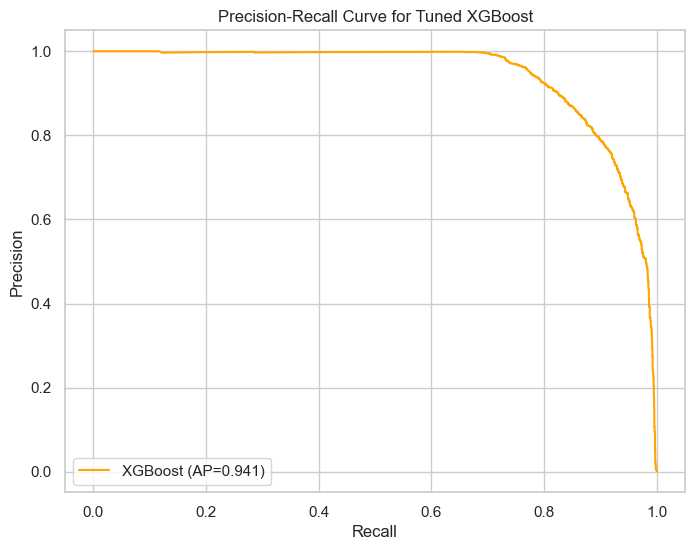

In [62]:
# Predict labels
y_pred_xgb = best_xgb_pipeline.predict(x_test)

# Classification report
print(" Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\n")

# Predict probabilities for class 1 (fraud)
y_scores_xgb = best_xgb_pipeline.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores_xgb)

# Calculate Average Precision Score
avg_precision = average_precision_score(y_test, y_scores_xgb)
print(f" Average Precision Score: {avg_precision:.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"XGBoost (AP={avg_precision:.3f})", color='orange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [63]:
#lgbm 
lgbm_pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LGBMClassifier(class_weight='balanced', random_state=42))
])


In [ ]:
lgbm_pipeline.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5504, number of negative: 4443875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 4449379, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrg',
                                                   'balanceDiffDest',
                                                   'zero_after_transfer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

LightGBM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904519
           1       0.26      0.99      0.41      2359

    accuracy                           1.00   1906878
   macro avg       0.63      1.00      0.71   1906878
weighted avg       1.00      1.00      1.00   1906878





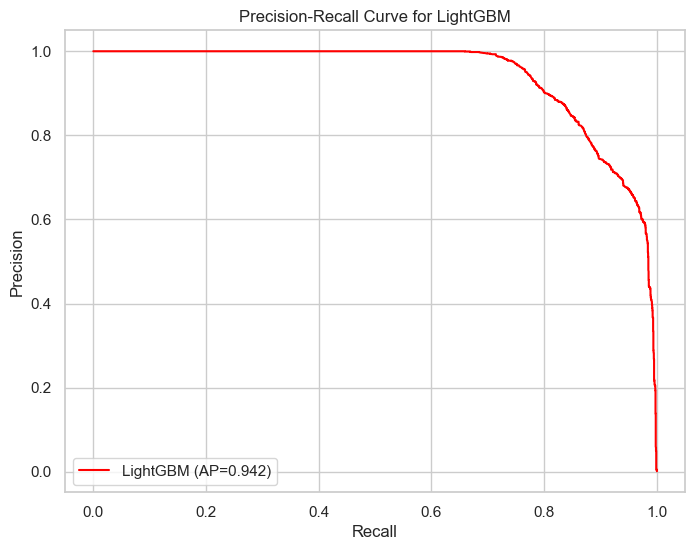

In [65]:

# Predict class labels
y_pred = lgbm_pipeline.predict(x_test)

print("LightGBM")
print(classification_report(y_test, y_pred))
print("\n")

# Get predicted probabilities for positive class (fraud=1)
y_scores = lgbm_pipeline.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"LightGBM (AP={avg_precision:.3f})", color='red')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for LightGBM")
plt.legend()
plt.grid(True)
plt.show()


<h1> Model Deployment and Save </h1>

In [ ]:
import joblib

# Save the tuned xgboost model
joblib.dump(best_xgb_pipeline, "fraud_detection_xgb.pkl")  

['fraud_detection_xgb.pkl']